<a href="https://colab.research.google.com/github/kimdonggyu2008/deep_daiv_-/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comparing LJ050-0275.wav...
Audio loaded: (201117,), Sample rate: 22050
Mel-Spectrogram shape: (128, 393)
Audio loaded: (200960,), Sample rate: 22050
Mel-Spectrogram shape: (128, 393)


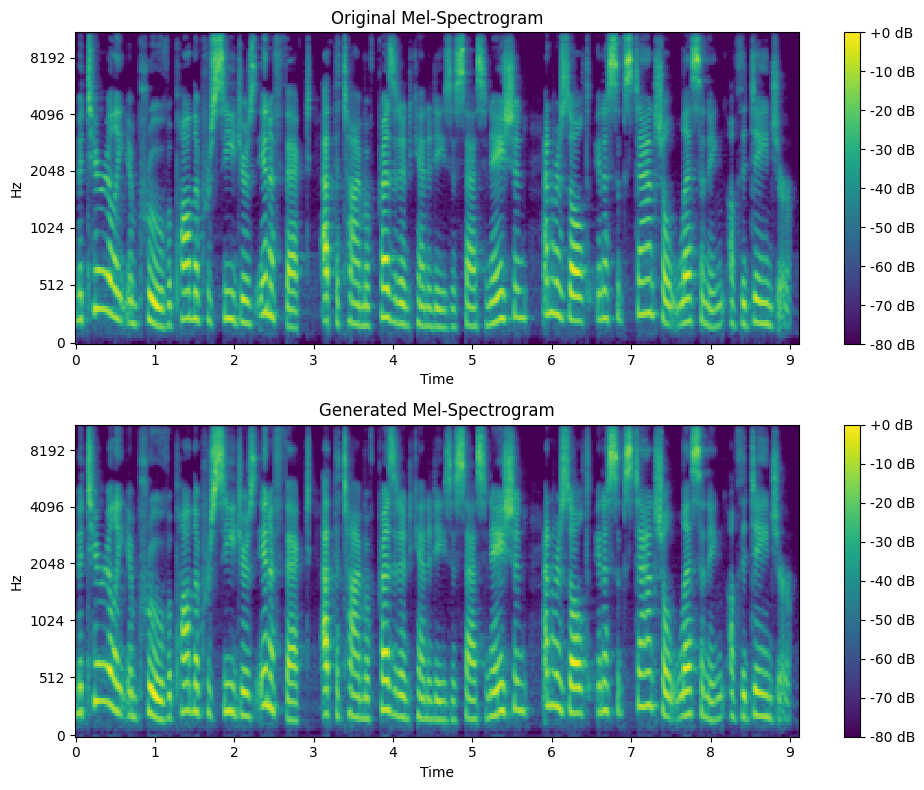

Comparing LJ050-0278.wav...
Audio loaded: (196765,), Sample rate: 22050
Mel-Spectrogram shape: (128, 385)
Audio loaded: (196608,), Sample rate: 22050
Mel-Spectrogram shape: (128, 385)


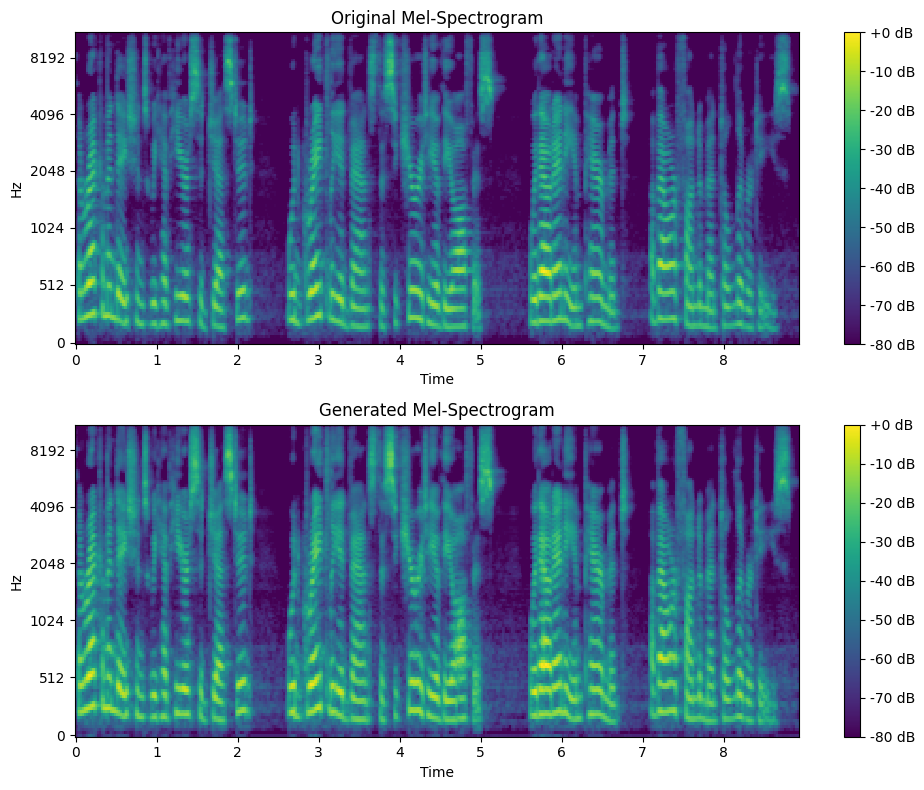

In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def compute_mel_spectrogram(file_path, sr=22050, n_fft=2048, hop_length=512, n_mels=128):
    y, sr = librosa.load(file_path, sr=sr)
    print(f"Audio loaded: {y.shape}, Sample rate: {sr}")  # 오디오 데이터 확인
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # dB 단위로 변환
    print(f"Mel-Spectrogram shape: {mel_spec_db.shape}")  # 멜 스펙트로그램 확인
    return mel_spec_db

def compare_mel_spectrograms(origin_file, result_file):
    origin_mel = compute_mel_spectrogram(origin_file)
    result_mel = compute_mel_spectrogram(result_file)

    plt.figure(figsize=(10, 8))

    # 원본 멜 스펙트로그램
    plt.subplot(2, 1, 1)
    librosa.display.specshow(origin_mel, sr=22050, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Original Mel-Spectrogram")

    # 생성된 멜 스펙트로그램
    plt.subplot(2, 1, 2)
    librosa.display.specshow(result_mel, sr=22050, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Generated Mel-Spectrogram")

    plt.tight_layout()
    plt.show()

# 공통 파일
result_path = "/content/drive/MyDrive/코딩공부/deep_daiv/daiv_fall/Avocodo/result/version_1"
origin_path = "/content/drive/MyDrive/코딩공부/deep_daiv/daiv_fall/Avocodo/dataset/LJSpeech-1.1/wavs"
common_files = set(os.listdir(result_path)) & set(os.listdir(origin_path))

# 2개의 공통 파일에 대해 실행
for file_name in list(common_files)[:2]:
    origin_file = os.path.join(origin_path, file_name)
    result_file = os.path.join(result_path, file_name)
    print(f"Comparing {file_name}...")
    compare_mel_spectrograms(origin_file, result_file)


Comparing LJ050-0275.wav...
Audio loaded: (200960,), Sample rate: 22050
Spectrogram shape: (1025, 393)


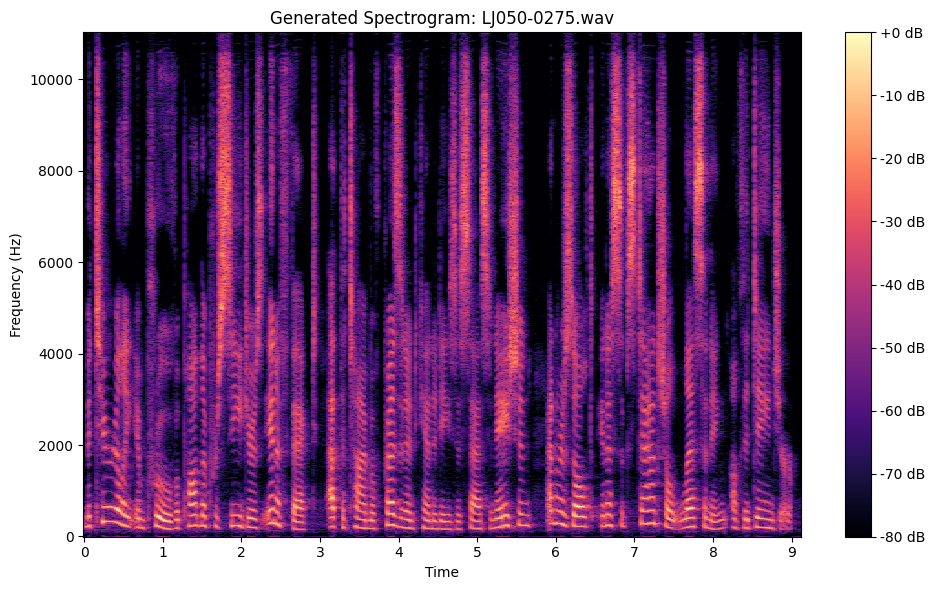

Audio loaded: (201117,), Sample rate: 22050
Spectrogram shape: (1025, 393)


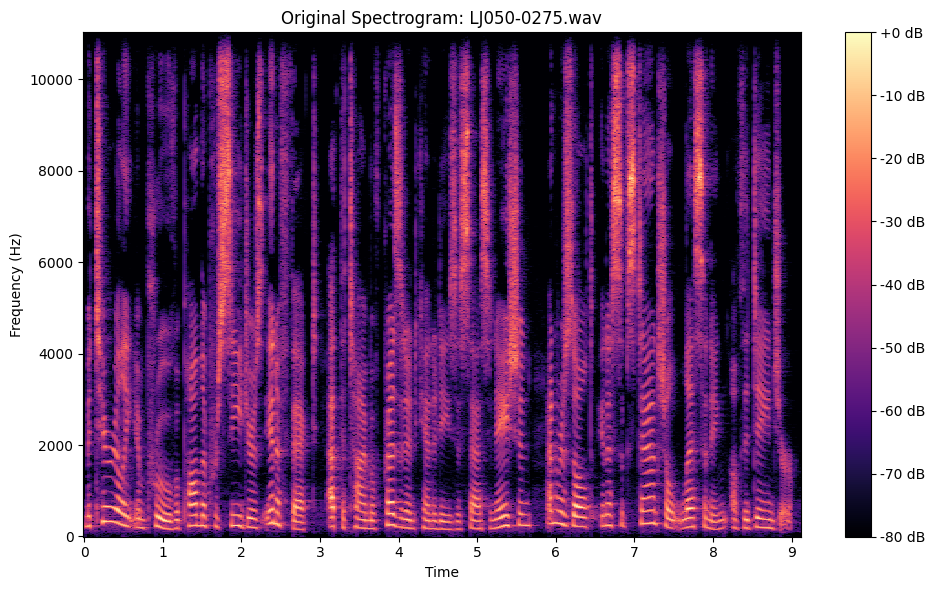

Comparing LJ050-0278.wav...
Audio loaded: (196608,), Sample rate: 22050
Spectrogram shape: (1025, 385)


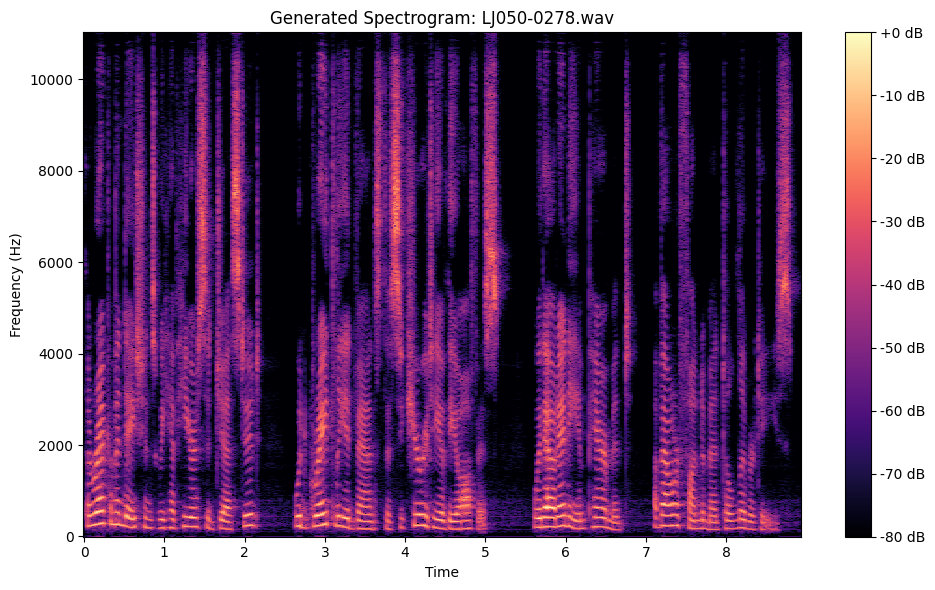

Audio loaded: (196765,), Sample rate: 22050
Spectrogram shape: (1025, 385)


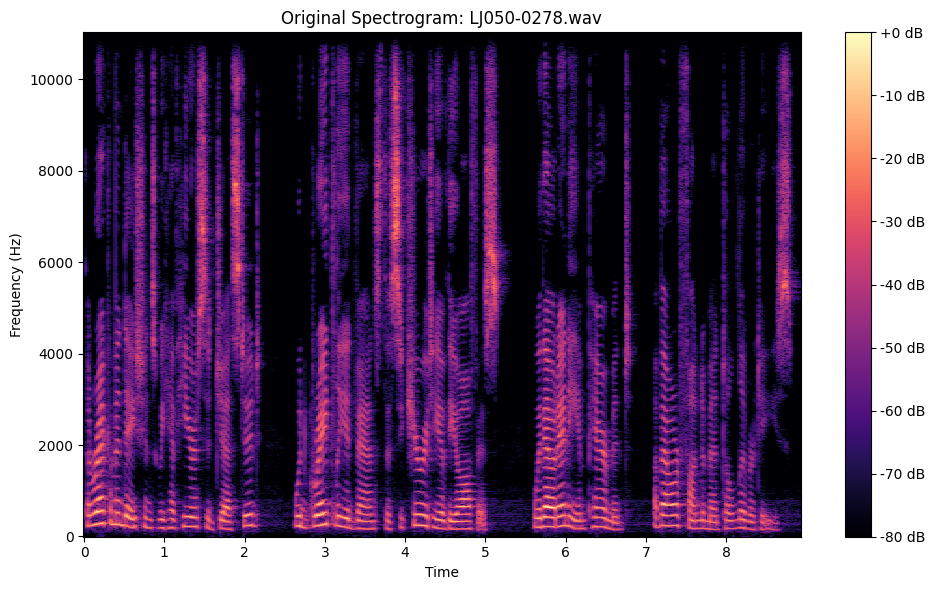

In [7]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def compute_spectrogram(file_path, sr=22050, n_fft=2048, hop_length=512):
    """
    Compute the spectrogram for a given WAV file.

    Args:
        file_path (str): Path to the WAV file.
        sr (int): Sampling rate for the audio.
        n_fft (int): Number of FFT components.
        hop_length (int): Hop length for STFT.

    Returns:
        np.ndarray: Spectrogram in decibel scale.
    """
    # Load the WAV file
    y, sr = librosa.load(file_path, sr=sr)
    print(f"Audio loaded: {y.shape}, Sample rate: {sr}")

    # Compute STFT (Short-Time Fourier Transform)
    spectrogram = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

    # Convert to magnitude and then dB scale
    spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)
    print(f"Spectrogram shape: {spectrogram_db.shape}")

    return spectrogram_db

def plot_spectrogram(spectrogram, sr=22050, hop_length=512, title="Spectrogram"):
    """
    Plot the given spectrogram.

    Args:
        spectrogram (np.ndarray): Spectrogram in decibel scale.
        sr (int): Sampling rate of the audio.
        hop_length (int): Hop length for STFT.
        title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

for file_name in list(common_files)[:2]:
    origin_file = os.path.join(origin_path, file_name)
    result_file = os.path.join(result_path, file_name)
    print(f"Comparing {file_name}...")

    # 생성된 스펙트로그램
    spectrogram_generated = compute_spectrogram(result_file)
    plot_spectrogram(spectrogram_generated, title=f"Generated Spectrogram: {file_name}")

    # 원본 스펙트로그램
    spectrogram_original = compute_spectrogram(origin_file)
    plot_spectrogram(spectrogram_original, title=f"Original Spectrogram: {file_name}")
